# Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv.

Целевая переменная – уровень дохода **income**, который принимает два значения $<=50K$ и $>50K$, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. 

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

In [1]:
import numpy as np
import pandas as pd # для работы с данными
import scipy.stats # для работы со статистикой
import matplotlib.pyplot as plt  # визуализация

##  Этапы работы:

### 1. Получите данные и загрузите их в рабочую среду


In [2]:
my_path = r"C:\Users\sveta\Documents\Netology\ML\Лекция_2\adult.csv"

In [3]:
data = pd.read_csv(my_path)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 2. Проведите первичный анализ.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Датасет состоит 14 столбцов и 48842 сторк. 6 столбцов являются целочисленными значениями, а еще 9 - строками

- age: возраст человека (численное значение)
- workclass: класс занятости (категориальное значение, Private, Self-emp-not-inc, Local-gov, и др)
- fnlwgt: вес наблюдения (численное значение)
- education: уровень образования (категориальное значение, HS-grad, Some-college, Bachelors, Masters, Assoc-voc, 11th и др)
- educational-num: количество лет обучения (численное значение)
- marital-status: семейное положение (категориальное значение, Married-civ-spouse, Divorced, Never-married и др.)
- occupation: профессия (категориальное значение, например, Prof-specialty, Craft-repair, Sales и др.)
- relationship: отношения в семье (категориальное значение, например, Husband, Wife, Own-child и др.)
- race: раса (категориальное значение, White, Black, Asian-Pac-Islander и др.)
- gender: пол (категориальное значение, Male или Female)
- capital-gain: прирост капитала (численное значение)
- capital-loss: убыток от капитала (численное значение)
- hours-per-week: количество рабочих часов в неделю (численное значение)
- native-country: родная страна (категориальное значение)

In [5]:
data['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

### 3. Проверьте данные на пропуски. Удалите в случае обнаружения. 
В данных есть ячейки со значением "?" , их нужно заменить на NaN и удалить строки с пропусками в признаках

In [6]:
data.replace(['?'], [np.nan], inplace=True)
data.dropna(inplace=True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
print('Удалено строк:', 48842-45222,'или', round((48842-45222)*100/48842, 2), '%')

Удалено строк: 3620 или 7.41 %


### 4. Визуализация 
должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

Оценим целочисленные значения

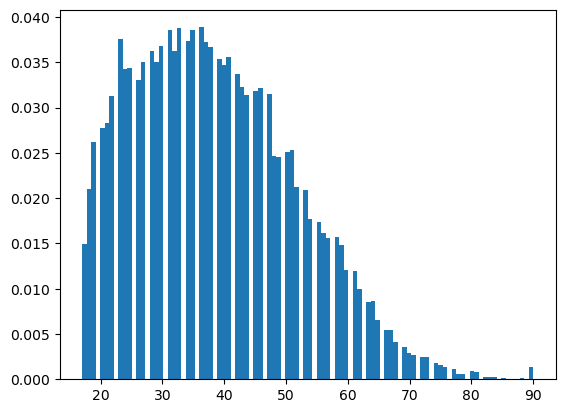

In [8]:
x = data['age']
h = plt.hist(x, bins=100, density=True)

Основная возрастная категория в датасете ~ 20 - 50 лет

Исследование только целочисленных данных не дало интересных результатов, поскольку целевая функция и большинство критериев - строковые значения

### 5. Преобразуйте категориальные признаки.

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
# выберем признаки
selectedColumns = data[['workclass', 'fnlwgt', 'education', 'gender', 'income']]
selectedColumns.head()

,workclass,fnlwgt,education,gender,income
0,Private,226802,11th,Male,<=50K
1,Private,89814,HS-grad,Male,<=50K
2,Local-gov,336951,Assoc-acdm,Male,>50K
3,Private,160323,Some-college,Male,>50K
5,Private,198693,10th,Male,<=50K


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# переведем income ее в значения 0 и 1
le.fit(data['income'])

LabelEncoder()

In [12]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [13]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series(data=le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [14]:
X = pd.get_dummies(selectedColumns, columns=['workclass', 'education', 'gender'], drop_first=True)
X

,fnlwgt,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,gender_Male
0,226802,<=50K,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,89814,<=50K,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,336951,>50K,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,160323,>50K,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5,198693,<=50K,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,257302,<=50K,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
48838,154374,>50K,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
48839,151910,<=50K,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48840,201490,<=50K,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
# удаляем целевой столбец из Х
del X['income']
X.head()

,fnlwgt,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,gender_Male
0,226802,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,89814,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,336951,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,160323,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5,198693,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Признак fnlwgt очень большой, относительно остальных. Следуем выполнить масштабирование

In [16]:
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

### 6. Разделите выборку на обучающее и тестовое подмножество. 
80% данных оставить на обучающее множество, 20% на тестовое.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.index

Int64Index([21762, 21701, 42663, 42694, 13590, 47537, 42284,  2021, 48236,
            46692,
            ...
            15594, 37624, 15046, 42351,  6849, 39182,  3157,  2411, 32125,
            10882],
           dtype='int64', length=9045)

### 7. Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

In [18]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [19]:
predictions[:20] # предсказания

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [20]:
model.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
model.predict_proba(X_test)

array([[0.97587673, 0.02412327],
       [0.80338687, 0.19661313],
       [0.69265939, 0.30734061],
       ...,
       [0.80205822, 0.19794178],
       [0.79883098, 0.20116902],
       [0.9144157 , 0.0855843 ]])

### 8. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. 
Для этого используйте встроенную функцию score.

#### Точность предсказаний логистической регерссии

На обучающей выборке:

In [22]:
model.score(X_train, y_train)

0.779970699615778

На тестовой выборке:

In [23]:
model.score(X_test, y_test)

0.7841901603095633

In [25]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVC

In [26]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

#### Точность предсказаний метода опорных векторов (SVM)

На обучающей выборке:

In [27]:
clf.score(X_train, y_train) 

0.7844486828648036

На тестовой выборке:

In [28]:
clf.score(X_test, y_test)

0.7894969596462134

# Выводы:

В процессе выполнения работы были получены базовые знания по предварительной обработке данных для применения моделей машинного обучения. В качестве результатов были построены две модели классификации, однако они используют только часть анализируемых данных, выбранных с учетом их предполагаемой значимости. 

Обе модели - логистическая регрессия и модель опорных векторов - продемонстрировали хорошие результаты в прогнозировании (точность  почти 80%). Важно отметить, что метод опорных векторов потребовал большего времени для обработки данных, возможно, из-за большого количества признаков. Для улучшения результатов, можно использовать другие признаки, которые могут раскрыть новые зависимости между признаками и целевым показателем, или применять другие методы моделирования из библиотеки sklearn.